In [96]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [261]:
def sigmoid(data):
    return 1 / (1 + np.exp(-data)) 

def sigmoid_derivative(data):
    return data * (1 - data)

def relu(Z):
    return np.maximum(0,Z)

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x
    
class NeuralNet():
    '''
    A two layer neural network
    '''
        
    def __init__(self, layers=[2, 3,1], learning_rate=0.01, iterations=50,
                 activation_function=sigmoid, der_activation_function=sigmoid_derivative):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        self.init_weights() #initialize weights and bias
        self.activation_function = activation_function
        self.der_activation_function = der_activation_function
                
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        #self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        #self.params['b2'] = np.random.randn(self.layers[2],)
        print(self.params)
        
    def eta(self, x):
        ETA = 0.0000000001
        return np.maximum(x, ETA)

    def entropy_loss(self,y, yhat):
        nsample = len(y)
        yhat_inv = 1.0 - yhat
        y_inv = 1.0 - y
        yhat_inv = self.eta(yhat_inv) 
        y_inv = self.eta(y_inv) 
        
        return -1 / nsample * (
            np.sum(
                (y * np.log(yhat)) + ((y_inv) * np.log(yhat_inv))
            )
        )

    def forward_propagation(self):
        '''
        Performs the forward propagation
        '''
        
        Z1 = self.X.dot(self.params['W1'])# + self.params['b1']
        A1 = self.activation_function(Z1)
        Z2 = A1.dot(self.params['W2'])# + self.params['b2']
        yhat = sigmoid(Z2)
        loss = self.entropy_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss

    def back_propagation(self,yhat):
        '''
        Computes the derivatives and update weights and bias according.
        '''
        y_inv = 1 - self.y
        yhat_inv = 1 - yhat

        dl_wrt_yhat = np.divide(y_inv, self.eta(yhat_inv)) - np.divide(self.y, self.eta(yhat))
        dl_wrt_sig = yhat * (yhat_inv)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        #dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

        dl_wrt_z1 = dl_wrt_A1 * self.activation_function(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        #dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

        #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        #self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        #self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2

    def fit(self, X, y):
        '''
        Trains the neural network using the specified data and labels
        '''
        self.X = X
        self.y = y

        for i in range(self.iterations):
            yhat, loss = self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)

    def predict(self, X):
        '''
        Predicts on a test data
        '''
        #print('X')
        #print(X.shape)
        #print(X)
        #print('W1')
        #print(self.params['W1'].shape)
        #print(self.params['W1'])
        Z1 = X.dot(self.params['W1'])# + self.params['b1']
        
        #print('Z1')
        #print(Z1)
        #print('Activ func1')
        #print(self.activation_function)
        A1 = self.activation_function(Z1)
        
        #print('A1')
        #print(A1.shape)
        #print(A1)
        #print('W2')
        #print(self.params['W2'].shape)
        #print(self.params['W2'])
        Z2 = A1.dot(self.params['W2'])# + self.params['b2']
        
       #print('Z2')
       #print(Z2)
       #print('Activ func2')
       #print(sigmoid)
        pred = sigmoid(Z2)
        return np.round(pred) 

    def acc(self, y, yhat):
        '''
        Calculates the accutacy between the predicted valuea and the truth labels
        '''
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        '''
        Plots the loss curve
        '''
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()

In [262]:
# add header names
headers =  ['age', 'sex','chest_pain','resting_blood_pressure',  
        'serum_cholestoral', 'fasting_blood_sugar', 'resting_ecg_results',
        'max_heart_rate_achieved', 'exercise_induced_angina', 'oldpeak',"slope of the peak",
        'num_of_major_vessels','thal', 'heart_disease']

heart_df = pd.read_csv('heart.csv', names=headers, skiprows=range(1))
heart_df = pd.read_csv('classification2.txt')
#convert imput to numpy arrays
#X = heart_df.drop(columns=['heart_disease'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
#heart_df['heart_disease'] = heart_df['heart_disease'].replace(1, 0)
#heart_df['heart_disease'] = heart_df['heart_disease'].replace(2, 1)

#y = heart_df['heart_disease'].values.reshape(X.shape[0], 1)

X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

#split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_train = y_train.values.reshape(y_train.shape[0], 1)
y_test = y_test.values.reshape(y_test.shape[0], 1)

#standardize the dataset
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

print(f"Shape of train set is {X_train.shape}")
print(f"Shape of test set is {X_test.shape}")
print(f"Shape of train label is {y_train.shape}")
print(f"Shape of test labels is {y_test.shape}")

np.savetxt('X_train.csv', X_train, delimiter=',')
np.savetxt('X_test.csv', X_test, delimiter=',')
np.savetxt('y_train.csv', y_train, delimiter=',')
np.savetxt('y_test.csv', y_test, delimiter=',')

Shape of train set is (81, 2)
Shape of test set is (36, 2)
Shape of train label is (81, 1)
Shape of test labels is (36, 1)


In [263]:
np.random.seed(1) # Seed the random number generator
nn = NeuralNet(activation_function=relu, der_activation_function=dRelu) # create the NN model

{'W1': array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ]]), 'W2': array([[ 1.74481176],
       [-0.7612069 ],
       [ 0.3190391 ]])}


In [264]:
nn.predict(X_test).reshape(len(X_test))

array([1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

<ipython-input-261-86e6d34b8656>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-data))
<ipython-input-261-86e6d34b8656>:57: RuntimeWarning: divide by zero encountered in log
  (y * np.log(yhat)) + ((y_inv) * np.log(yhat_inv))
<ipython-input-261-86e6d34b8656>:57: RuntimeWarning: invalid value encountered in multiply
  (y * np.log(yhat)) + ((y_inv) * np.log(yhat_inv))


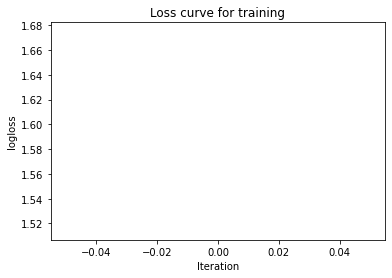

In [265]:
nn.fit(X_train, y_train) #train the model
nn.plot_loss()

In [212]:
test_pred

array([[0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])